In [1]:
# Import preliminary libraries
import numpy as np
from numpy.fft import fft, fftshift
import pandas as pd
import matplotlib.pyplot as plt
from NMR_ML import Dataset, Polynomial_features, FeatureImportancePlot, FourierTransform

In [2]:
# Create a dataset object for the gaussian kernel type simulation and load all data

gaus = Dataset(data_directory_path="../work/data/2021-08-14_gauss/")
rawdata = gaus.load_data()
params = gaus.load_params()
kers = gaus.load_wlist()   # we perform regression on this variable
y_classes  = gaus.get_yclasses()
rscl_df, _ = gaus.get_window(rawdata, center_ratio=2/3, width=150)

Finished loading rawdata into numpy array
Finished loading parameters file
Finished loading kernel-integrals file.
Finished loading parameters file
Finished loading kernel-integrals file.
The Echo pulse occurs at timestep: 1256


In [3]:
# Kernel integrals dataset
kers.head()

,0
0,0.114080
1,0.165097
2,0.115453
3,0.127511
4,0.156341


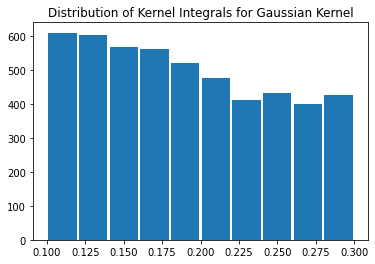

In [4]:
plt.hist(kers.values.ravel(), rwidth=0.92)
plt.title("Distribution of Kernel Integrals for Gaussian Kernel")
plt.show()

In [5]:
# Convert the rescaled-dataframe to a numpy array and verify shape
rscl_df.to_numpy().shape

(5000, 300)

In [6]:
# Fourier transform data
ft_data = FourierTransform(zero_padding=8).transform(rscl_df.to_numpy())

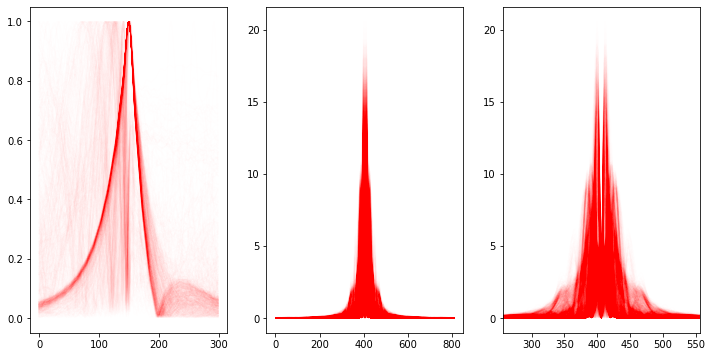

In [7]:
# Plot to visualize datasets
fig, ax = plt.subplots(1,3, figsize=(12,6))

ax[0].plot(rscl_df.to_numpy()[::5].T, alpha=0.002, color='red')

ax[1].plot(ft_data.T, alpha=0.002, color='red')

ax[2].plot(ft_data.T, alpha=0.002, color='red')
ax[2].set_xlim(406-150,406+150)
plt.show()

# Polynomial Feature extraction from timeseries and Frequency-bins

In [8]:
# Create the Polynomial_features object and extract features for the timeseries and freqeuency domain datasets

pf = Polynomial_features(n_splits=[4, 5, 10], order_fits=[3, 3, 3])
%time ts_pf = pf.extract(rscl_df.to_numpy())
%time fs_pf = pf.extract(ft_data[:, 6:-6])

Wall time: 21.8 s
Wall time: 22.9 s


In [9]:
rscl_df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299
0,0.046998,0.047899,0.048976,0.050135,0.051244,0.052152,0.052715,0.052829,0.052453,0.051630,...,0.076163,0.073727,0.071628,0.069927,0.068620,0.067656,0.066954,0.066416,0.065942,0.065440
1,0.033260,0.032670,0.032096,0.031726,0.031692,0.032041,0.032729,0.033647,0.034668,0.035671,...,0.009927,0.009936,0.010065,0.010292,0.010670,0.011258,0.012027,0.012833,0.013472,0.013761
2,0.036057,0.035182,0.034550,0.034317,0.034548,0.035204,0.036165,0.037262,0.038330,0.039254,...,0.051485,0.050636,0.049978,0.049500,0.049118,0.048694,0.048080,0.047161,0.045886,0.044295
3,0.046061,0.047268,0.048244,0.048961,0.049426,0.049685,0.049820,0.049934,0.050135,0.050511,...,0.035593,0.034321,0.032943,0.031631,0.030542,0.029780,0.029382,0.029326,0.029558,0.030009
4,0.048227,0.049512,0.050739,0.051835,0.052745,0.053455,0.053991,0.054416,0.054804,0.055227,...,0.039747,0.038892,0.038193,0.037767,0.037657,0.037831,0.038193,0.038614,0.038968,0.039153


In [10]:
# Polynomial features for timeseries
ts_pf.head()

,4_1_3,4_1_2,4_1_1,4_1_0,4_2_3,4_2_2,4_2_1,4_2_0,4_3_3,4_3_2,...,10_8_1,10_8_0,10_9_3,10_9_2,10_9_1,10_9_0,10_10_3,10_10_2,10_10_1,10_10_0
0,-2.803564e-07,0.000014,0.001829,0.083943,1.892147e-06,0.000163,0.008879,0.360918,-5.586193e-08,0.000307,...,0.002309,0.083844,7.849371e-07,-0.000016,-0.000236,0.095559,-3.413139e-07,-0.000046,-0.000825,0.083165
1,1.416806e-07,0.000019,0.001632,0.069931,9.861831e-07,0.000134,0.010010,0.407446,-1.012685e-06,0.000165,...,-0.003856,0.075882,-1.610505e-06,0.000007,-0.000914,0.015629,2.210606e-06,-0.000014,-0.000039,0.011011
2,1.834305e-07,0.000006,0.001375,0.079726,1.483040e-06,0.000138,0.009670,0.387276,-1.278877e-07,0.000251,...,0.001863,0.051793,2.125097e-06,0.000012,-0.000798,0.058366,-3.641176e-06,-0.000021,0.000376,0.051556
3,-3.027449e-08,0.000026,0.001742,0.077971,1.312491e-06,0.000133,0.009490,0.404720,-1.389840e-06,0.000192,...,-0.001103,0.009640,1.053047e-07,-0.000058,0.000665,0.042560,1.433586e-06,-0.000008,-0.000810,0.038228
4,8.582691e-08,0.000025,0.001638,0.081954,1.256443e-06,0.000145,0.009451,0.395299,-9.384739e-07,0.000216,...,0.002390,0.015731,2.757922e-06,-0.000019,-0.000288,0.056697,9.078677e-07,0.000037,-0.000885,0.042304


In [11]:
# Polynomial features for freqeuency data
fs_pf.head()

,4_1_3,4_1_2,4_1_1,4_1_0,4_2_3,4_2_2,4_2_1,4_2_0,4_3_3,4_3_2,...,10_8_1,10_8_0,10_9_3,10_9_2,10_9_1,10_9_0,10_10_3,10_10_2,10_10_1,10_10_0
0,5.305816e-11,7.920075e-09,9.548555e-07,0.000069,0.000002,0.000121,-0.007634,-0.200335,-2.028896e-06,0.000110,...,-5.004408e-06,0.000294,-9.537441e-11,8.518103e-09,-1.239484e-06,0.000095,-5.575541e-12,8.046966e-10,-5.607649e-07,0.000026
1,-8.727785e-12,2.815602e-10,4.485928e-08,0.000005,0.000001,0.000056,-0.003527,-0.093192,-9.401634e-07,0.000051,...,5.717774e-09,0.000006,-1.468560e-10,3.665535e-09,1.316385e-07,0.000004,3.043155e-11,5.109008e-09,4.666406e-08,0.000004
2,1.336098e-11,3.593627e-09,5.523937e-07,0.000126,0.000002,0.000114,-0.007220,-0.190036,-1.914595e-06,0.000104,...,-2.049469e-06,0.000242,-5.894017e-10,3.110621e-09,-3.147838e-07,0.000138,-4.411538e-10,2.628520e-09,1.086743e-07,0.000104
3,3.955099e-15,-6.746950e-10,2.718780e-09,0.000009,0.000002,0.000095,-0.006016,-0.159020,-1.596490e-06,0.000087,...,3.464198e-08,0.000003,3.361534e-10,5.643647e-09,-3.231713e-07,0.000005,-7.307463e-12,-4.860661e-11,-9.676159e-08,0.000006
4,4.802173e-12,1.166416e-09,2.205905e-07,0.000019,0.000002,0.000106,-0.006734,-0.177403,-1.784376e-06,0.000097,...,-7.038412e-07,0.000059,-1.221847e-10,5.230616e-10,-1.896640e-07,0.000024,-7.853213e-11,3.638288e-09,-9.268774e-08,0.000007


# Random Forest Model 

- We employ a random forest model to perform regression on the kernel-integral weights based on the magentization data alone.

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [13]:
def get_R2(x_data, y_data):
    score = []
    for i in range(5):
        x_train, x_test ,y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=10+10*i)
        model = RandomForestRegressor(n_estimators=100, max_features="sqrt", n_jobs=-1)
        model.fit(x_train, y_train.values.ravel())
        score.append(model.score(x_test, y_test))
    
    return model, score, model.predict(x_test), y_test

In [14]:
m1, score1, y_pred1, y_test1 = get_R2(rscl_df, kers)
m2, score2, y_pred2, _ = get_R2(ts_pf, kers)
m3, score3, y_pred3, _ = get_R2(pd.DataFrame(ft_data), kers)
m4, score4, y_pred4, _ = get_R2(fs_pf, kers)

In [15]:
mean = list(map(np.mean, [score1, score2, score3, score4]))
std = list(map(np.std, [score1, score2, score3, score4]))

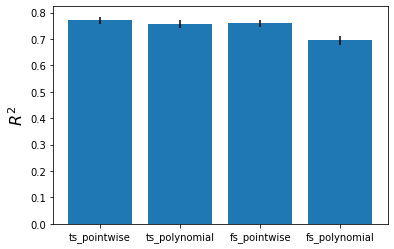

In [16]:
fig,ax = plt.subplots()
ax.bar(x=np.arange(4), height=mean, yerr=std)

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["ts_pointwise", "ts_polynomial", "fs_pointwise", "fs_polynomial"])
ax.set_ylabel('$R^2$', fontsize=16)
plt.show()

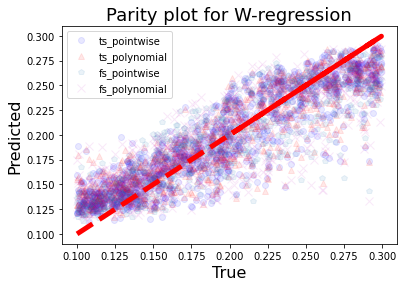

In [17]:
# Parity Plot

plt.plot(y_test1, y_pred1, 'bo', alpha=0.09, label='ts_pointwise')
plt.plot(y_test1, y_pred2, 'r^', alpha=0.09, label='ts_polynomial')
plt.plot(y_test1, y_pred3, 'p', alpha=0.09, label='fs_pointwise')
plt.plot(y_test1, y_pred4, 'mx',markersize=8, alpha=0.09, label='fs_polynomial')

plt.plot(y_test1, y_test1, 'r--', lw=5)

plt.ylabel("Predicted", fontsize=16)
plt.xlabel("True", fontsize=16)
plt.title("Parity plot for W-regression", fontsize=18)
plt.legend()

plt.show()

In [18]:
# Here we plot the feature importance plot form the timeseries data

fip = FeatureImportancePlot(length_tseries=300, n_splits=[4,5,10], kind='polyfeatures')
fi_df = fip.get_fi(m2, ts_pf)
fi_df.head()

,feature,fi,order,color
27,5_3_0,0.058629,0,r
3,4_1_0,0.057209,0,r
26,5_3_1,0.051498,1,b
25,5_3_2,0.048630,2,g
19,5_1_0,0.044059,0,r


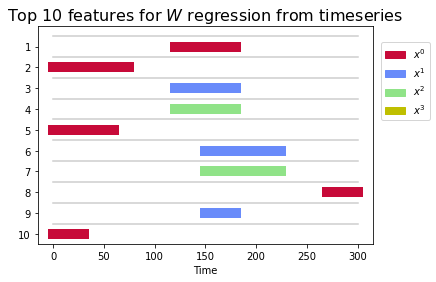

In [19]:
# Play with the top features required
ntop=10
fig, ax = plt.subplots()
ax.set_title("Top 10 features for $W$ regression from timeseries", fontsize=16)
fip.fi_df2plot(fi_df, ntop=ntop, ax=ax); plt.show()


plt.show()